### Random Forest
This file fits the data to a random forest model. The first model uses the  default parameters, while the second model uses hyperparameters generated by a random search.

In [12]:
#importing the data
import pandas as pd
import numpy as np
from pathlib import Path

In [13]:
#importing the data
PARENT = "Predicing_House_Prices"
path = Path(PARENT).parent / "../Data/X_train_model2.csv"
X_train_model2 = pd.read_csv(path)

path2 = Path(PARENT).parent / "../Data/X_valid_model2.csv"
X_valid_model2 = pd.read_csv(path2)

path3 = Path(PARENT).parent / "../Data/y_train_model2.csv"
y_train_model2 = pd.read_csv(path3)

path4 = Path(PARENT).parent / "../Data/y_valid_model2.csv"
y_valid_model2 = pd.read_csv(path4)

In [14]:
#dropping unnamed column
X_train_model2 = X_train_model2.drop(columns="Unnamed: 0")
X_valid_model2 = X_valid_model2.drop(columns="Unnamed: 0")
y_train_model2 = y_train_model2.drop(columns="Unnamed: 0")
y_valid_model2 = y_valid_model2.drop(columns="Unnamed: 0")

### PCA
Below I will apply PCA and tune the dimensionality.

In [49]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca64 = PCA(n_components= 1759, random_state= 1222)
X_digits3 = pca64.fit_transform(X_train_model2)

dem = list(range(1,1760))
#getting cumulative explained variance
var = pca64.explained_variance_
all_var = []
curr_var = 0

for v in var:
    curr_var += v
    all_var.append(curr_var)


In [50]:
print(all_var[-1])

10.276403482998498


In [51]:
#changing the variance to a ratio
all_var_prec = []
for var2 in all_var:
    new_var = (var2 / 10.276403482998498)
    all_var_prec.append(new_var)

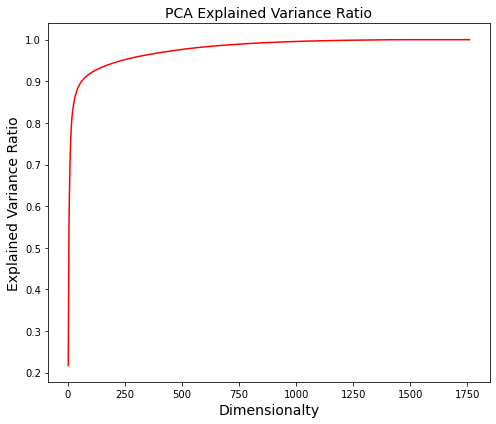

In [52]:
#plotting the explained variance
plt.figure(figsize=(7, 6))
plt.plot(dem, all_var_prec, "r")
plt.xlabel("Dimensionalty", fontsize=14)
plt.ylabel("Explained Variance Ratio", fontsize=14)
plt.title("PCA Explained Variance Ratio", fontsize=14)
plt.tight_layout()
plt.show()

Fitting PCA with 30 dimensions because it is the point where most of the variance is explained.

In [53]:
pca30 = PCA(n_components= 30, random_state= 1222)
X_digits4 = pca64.fit_transform(X_train_model2)

In [55]:
X_digits4_valid = pca64.transform(X_valid_model2)

In [54]:
#training the default linear regression model
from sklearn.ensemble import RandomForestRegressor

rf1 = RandomForestRegressor().fit(X_train_model2, y_train_model2)

/var/folders/zt/403bn89s3rngsx698hkqx3nr0000gn/T/ipykernel_84162/549837171.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1 = RandomForestRegressor().fit(X_train_model2, y_train_model2)


In [10]:
#getting the R^2 and MSE
from sklearn.metrics import mean_squared_error
preds= rf1.predict(X_valid_model2)

print("Mean Squared Error:", format(mean_squared_error(y_valid_model2, preds)))
print("R Squared:", format(rf1.score(X_valid_model2, y_valid_model2)))

Mean Squared Error: 2239737288334.018
R Squared: 0.5924126235721192


In [57]:
rf1_PCA = RandomForestRegressor().fit(X_digits4, y_train_model2.values.ravel())

In [ ]:
preds_PCA= rf1_PCA.predict(X_digits4_valid)

print("Mean Squared Error:", format(mean_squared_error(y_valid_model2, preds_PCA)))
print("R Squared:", format(rf1_PCA.score(X_digits4_valid, y_valid_model2)))

# random search for parameters

from sklearn.model_selection import RandomizedSearchCV
import random
from sklearn.utils.fixes import loguniform


random.seed(3467)
# run randomized search
rf_search = RandomForestRegressor(n_jobs=None
  ).fit(X_train_model2, y_train_model2)

#intializing possible parameters
params = {
    "n_estimators": loguniform(1,300),
    #"criterion": ["squared_error", "absolute_error", "poisson"],
    "max_depth": loguniform(10,50),
    "min_samples": loguniform(1,10),
    "min_samples_leaf": loguniform(1,10),
    #"min_weight_fraction_leaf": loguniform(0,100),
    "max_features": ["auto", "sqrt", "log2"],
    #"max_leaf_nodes": loguniform(0,100),
    #"min_impurity_decrease": loguniform(0,100),
    "bootstrap": [True, False],
    "oob_score": [True, False],
    #"verbose": loguniform(0,100),
    "warm_start":[True, False],
    #"ccp_alpha": loguniform(0,100),
    #"max_samples":loguniform(0,100)

}
#number of iterations
n_iter_search = 100
random_search = RandomizedSearchCV(
    rf_search, param_distributions=params, 
    n_iter=n_iter_search, 
    cv= 3, n_jobs = -1
)
#fitting the random search
random_search.fit(X_train_model2, y_train_model2)
#printing the results
rand_opt = random_search.best_params_
print(rand_opt)

In [8]:
#training the model with random search optimal parameters

rf2 = RandomForestRegressor(n_estimators=50).fit(X_train_model2, y_train_model2)

/var/folders/zt/403bn89s3rngsx698hkqx3nr0000gn/T/ipykernel_84162/3191948829.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf2 = RandomForestRegressor(n_estimators=50).fit(X_train_model2, y_train_model2)


In [11]:
#getting the R^2
preds2= rf2.predict(X_valid_model2)

print("Mean Squared Error:", format(mean_squared_error(y_valid_model2, preds2)))
print("R Squared:", format(rf2.score(X_valid_model2, y_valid_model2)))

Mean Squared Error: 2226167402771.661
R Squared: 0.5948820712540397
